In [9]:
import sys
sys.path.append('../') # 実行ディレクトリをrootとする
sys.path.append('../module/')
from module import models1

import pandas as pd

from sklearn.model_selection import StratifiedKFold

INPUT_PATH = '../input/'
OUTPUT_PATH = '../output/'

train = pd.read_csv(INPUT_PATH+'train.csv')
test = pd.read_csv(INPUT_PATH+'test.csv')

SEED=71

train_y = train['genre']
train_feat_df = train.drop(['index','genre', 'tempo', 'region'], axis=1)
test_feat_df = test.drop(['index','tempo', 'region'], axis=1)

In [10]:
train_feat_df

,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness
0,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884
1,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910
2,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470
3,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399
4,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030
...,...,...,...,...,...,...,...,...,...,...
4041,38,246309,0.128795,0.329718,0.575830,-5.252543,0.509531,0.193781,0.187331,0.158197
4042,23,208734,0.778732,0.228757,0.394283,-14.225700,0.322871,0.253108,0.141218,0.295608
4043,30,407016,0.402050,0.462374,0.672265,-10.711253,0.646571,0.228189,0.152270,0.163483
4044,25,204957,0.208096,0.465511,0.523514,-7.855946,0.508910,0.247820,0.202238,0.210184


In [17]:
models1.Base_Model()

AttributeError: module 'module.models1' has no attribute 'Base_Model'

In [11]:
def make_cv(n_split, seed):
    fold = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=seed)
    return list(fold.split(train, train_y))


cv = make_cv(5, SEED)


params={'boosting_type': 'gbdt',
 'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_class': 11,
 #'feature_pre_filter': False,
 'lambda_l1': 1.8260943871703617,
 'lambda_l2': 8.704872539528923,
 'num_leaves': 17,
 'feature_fraction': 0.8999999999999999,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 10,
 'verbosity':300,
 #'learning_rate':0.01
  #'force_col_wise':True
       }

model = models1.Lgbm(params)

oof_preds_lgb, test_preds_lgb, evals_result_lgb = model.cv(train_y,
                                                         train_feat_df,
                                                         test_feat_df,
                                                         cv,
                                                         is_reg=False)

AttributeError: module 'module.models1' has no attribute 'Lgbm'

(<Figure size 432x1008 with 2 Axes>,
 array([<AxesSubplot:xlabel='column', ylabel='feature_importance'>,
        <AxesSubplot:>], dtype=object))

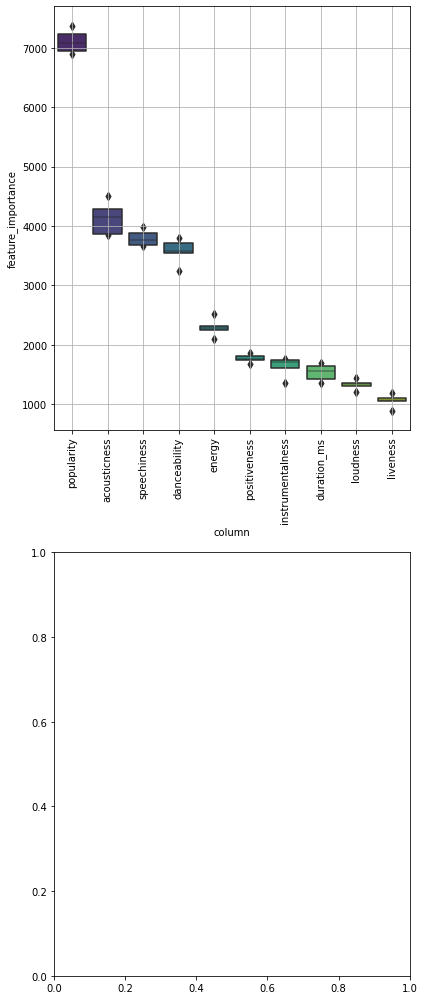

In [4]:
model.visualize_importance()